### Setup

,Model,accuracy,f1_weighted,precision_weighted,recall_weighted
0,Baseline 1 (Majority),0.333,0.167,0.000,0.000
1,Baseline 2 (TF-IDF + LR),0.939,0.939,0.000,0.000
2,Transformer (DistilBERT),0.939,0.939,0.948,0.939


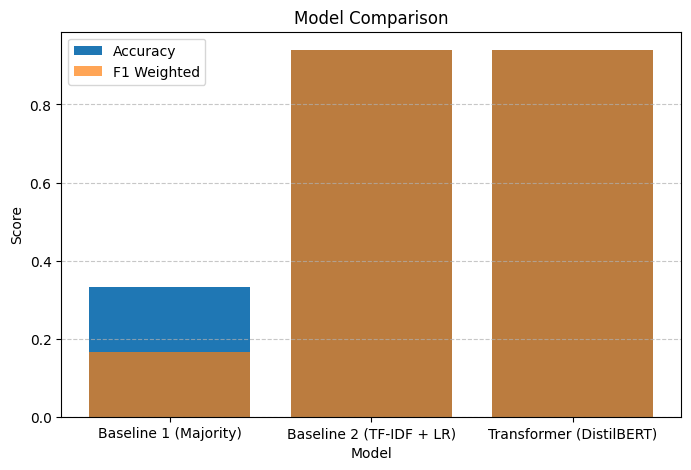

In [13]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# --- Load metrics ---
paths = {
    "Baseline 1 (Majority)": "./artifacts/baseline1_metrics.json",
    "Baseline 2 (TF-IDF + LR)": "./artifacts/baseline2_metrics.json",
    "Transformer (DistilBERT)": "./artifacts/transformer_metrics.json",
}

results = []

for model_name, path in paths.items():
    try:
        with open(path, "r") as f:
            metrics = json.load(f)
            
            # If metrics are nested like {"majority_classifier": {...}}, flatten them
            if isinstance(metrics, dict) and len(metrics) == 1:
                key = next(iter(metrics))
                metrics = metrics[key]
                
            results.append({
                "Model": model_name,
                "accuracy": float(metrics.get("accuracy", 0)),
                "f1_weighted": float(metrics.get("f1_weighted", metrics.get("weighted_f1", 0))),
                "precision_weighted": float(metrics.get("precision_weighted", 0)),
                "recall_weighted": float(metrics.get("recall_weighted", 0)),
            })
    except Exception as e:
        print(f"⚠️ Could not read {path}: {e}")

# --- Create DataFrame ---
df_metrics = pd.DataFrame(results)

# --- Display formatted table ---
display(df_metrics.style.format({
    "accuracy": "{:.3f}",
    "f1_weighted": "{:.3f}",
    "precision_weighted": "{:.3f}",
    "recall_weighted": "{:.3f}",
}))

# --- Visualization ---
plt.figure(figsize=(8, 5))
plt.bar(df_metrics["Model"], df_metrics["accuracy"], label="Accuracy")
plt.bar(df_metrics["Model"], df_metrics["f1_weighted"], alpha=0.7, label="F1 Weighted")
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


###  Metrics Comparison Table

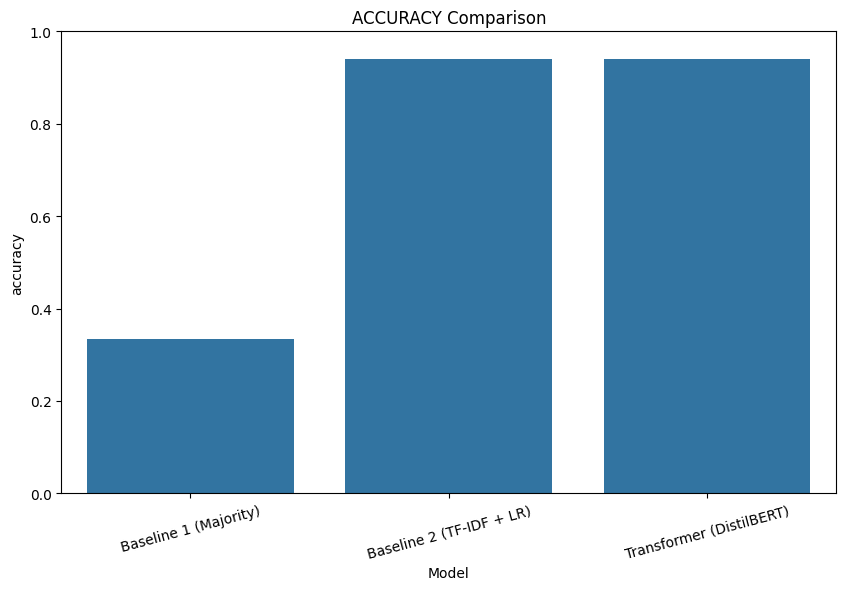

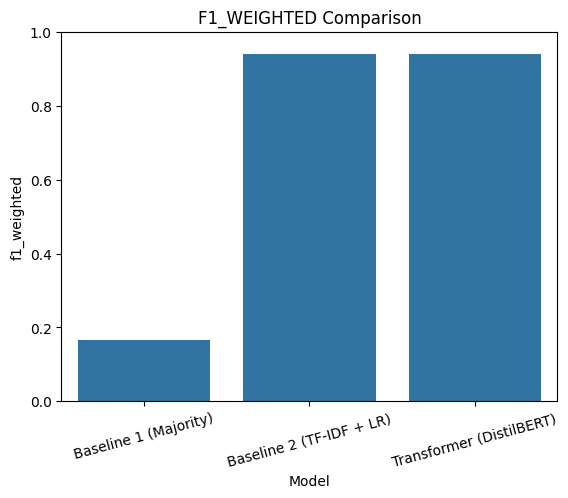

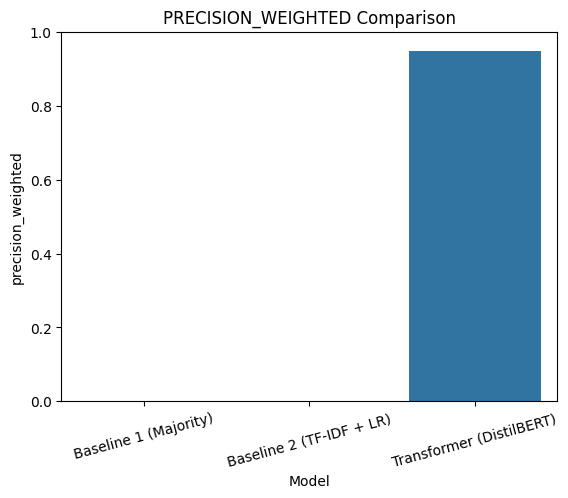

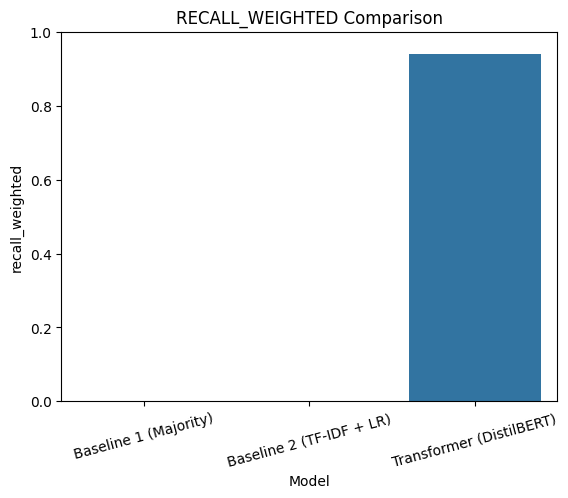

In [15]:
# --- Plot Bar Charts ---
metric_names = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

plt.figure(figsize=(10, 6))
for metric in metric_names:
    sns.barplot(x='Model', y=metric, data=df_metrics)
    plt.title(f"{metric.upper()} Comparison")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=15)
    plt.show()

### Confusion Matrix (Transformer Model)

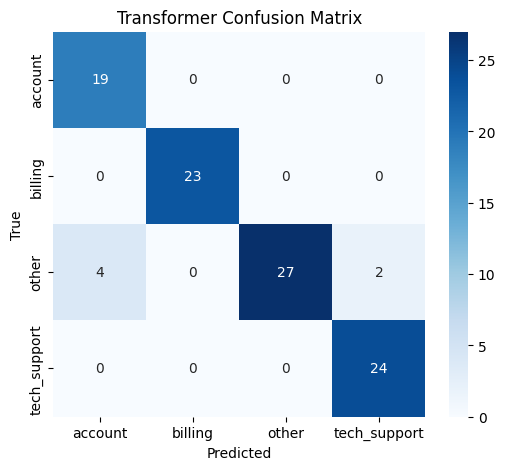

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Load transformer predictions
preds_path = os.path.join(ARTIFACTS_DIR, "transformer_val_predictions.csv")
if os.path.exists(preds_path):
    preds_df = pd.read_csv(preds_path)
    cm = confusion_matrix(preds_df['y_true'], preds_df['y_pred'])
    labels = sorted(preds_df['y_true'].unique())

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Transformer Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
else:
    print("No prediction file found for Transformer model.")